In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading the datasets

customers = pd.read_csv('/Customers.csv')
products = pd.read_csv('/Products.csv')
transactions = pd.read_csv('/Transactions.csv')



In [ ]:
# Converting date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [ ]:
# Merging datasets for EDA
merged_data = transactions.merge(customers, on='CustomerID', how='left')
merged_data = merged_data.merge(products, on='ProductID', how='left')

In [ ]:
# Checking for null values
print("Null values in merged dataset:\n", merged_data.isnull().sum())

Null values in merged dataset:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64


In [ ]:
# Summary statistics
print("\nSummary statistics:\n", merged_data.describe(include='all'))


Summary statistics:
        TransactionID CustomerID ProductID                TransactionDate  \
count           1000       1000      1000                           1000   
unique          1000        199       100                            NaN   
top           T00001      C0109      P059                            NaN   
freq               1         11        19                            NaN   
mean             NaN        NaN       NaN  2024-06-23 15:33:02.768999936   
min              NaN        NaN       NaN            2023-12-30 15:29:12   
25%              NaN        NaN       NaN     2024-03-25 22:05:34.500000   
50%              NaN        NaN       NaN     2024-06-26 17:21:52.500000   
75%              NaN        NaN       NaN            2024-09-19 14:19:57   
max              NaN        NaN       NaN            2024-12-28 11:00:00   
std              NaN        NaN       NaN                            NaN   

           Quantity   TotalValue     Price_x   CustomerName      

<ipython-input-7-f422cd8c5bb6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


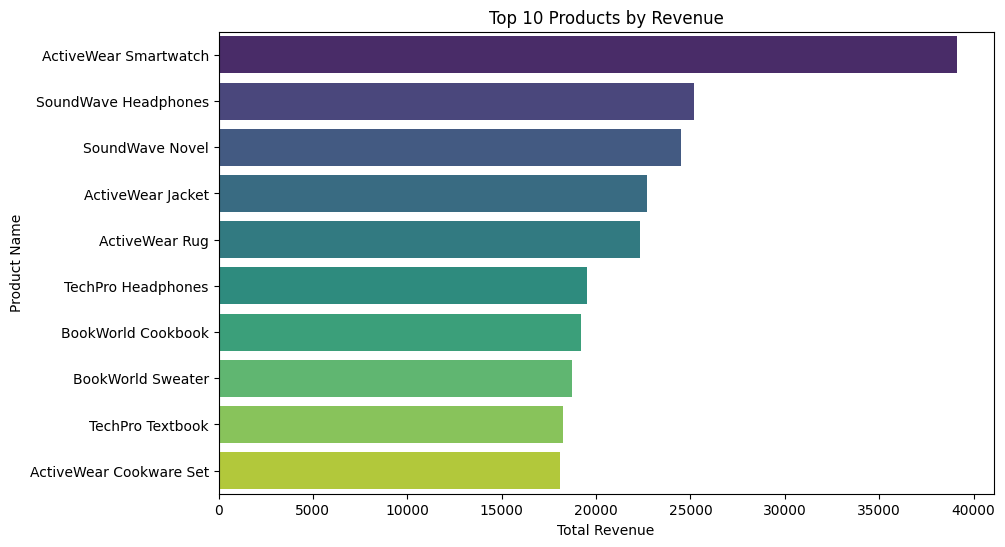

In [ ]:
# 1. Top-selling products based on revenue
top_products = (
    merged_data.groupby('ProductName')['TotalValue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.show()


<ipython-input-8-6a3b404db3b2>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette='pastel')


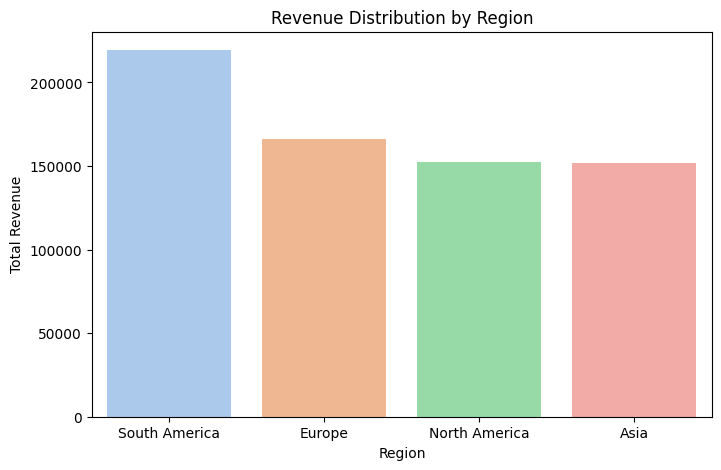

In [ ]:
# 2. Regional revenue distribution
region_sales = (
    merged_data.groupby('Region')['TotalValue']
    .sum()
    .sort_values(ascending=False)
)
plt.figure(figsize=(8, 5))
sns.barplot(x=region_sales.index, y=region_sales.values, palette='pastel')
plt.title('Revenue Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.show()

<ipython-input-9-48ca8b96f285>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='muted')


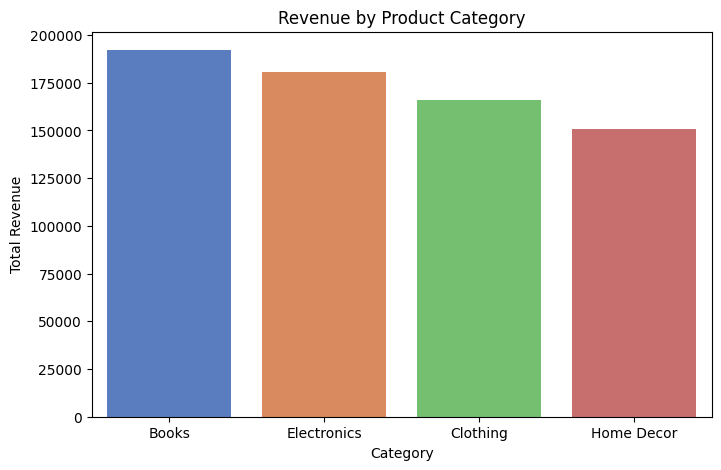

In [ ]:
# 3. Category-wise revenue distribution
category_sales = (
    merged_data.groupby('Category')['TotalValue']
    .sum()
    .sort_values(ascending=False)
)
plt.figure(figsize=(8, 5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='muted')
plt.title('Revenue by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.show()

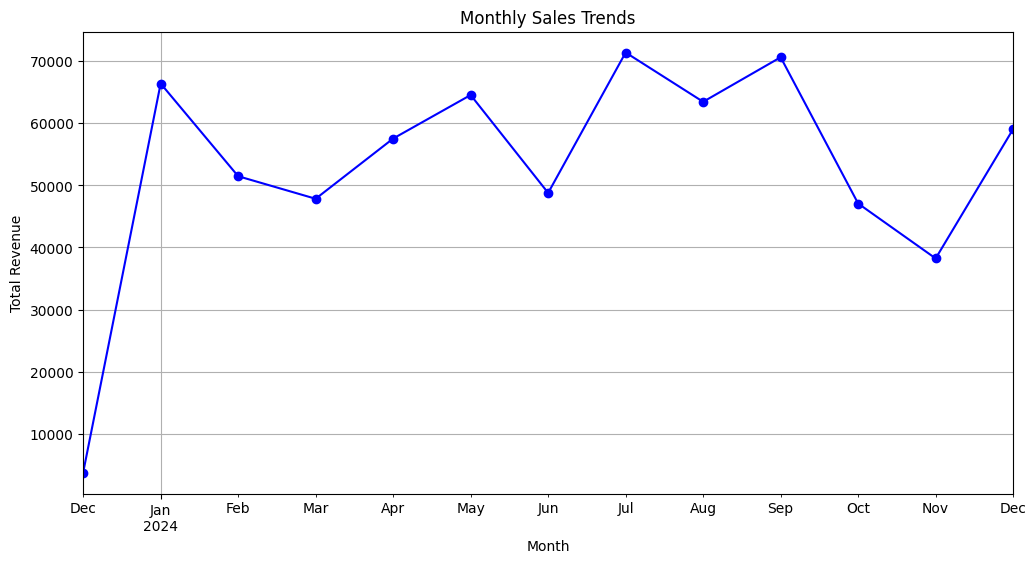

In [ ]:
# 4. Monthly sales trends
merged_data['TransactionMonth'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_sales = (
    merged_data.groupby('TransactionMonth')['TotalValue']
    .sum()
    .sort_index()
)
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid()
plt.show()

<ipython-input-11-2b38295abf33>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette='Blues_r')


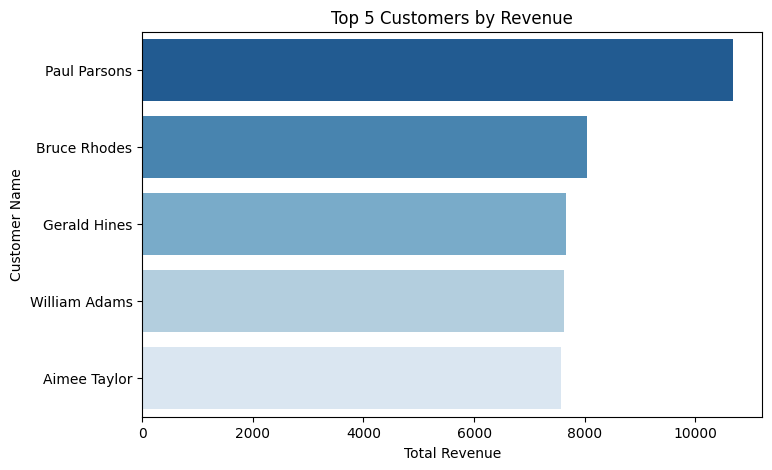

In [ ]:
# 5. Customer contribution to revenue (Top 5 customers)
top_customers = (
    merged_data.groupby('CustomerName')['TotalValue']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_customers.values, y=top_customers.index, palette='Blues_r')
plt.title('Top 5 Customers by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Customer Name')
plt.show()